In [1]:
# import libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# load the cleaned Titanic datasetc
df = pd.read_csv("cleaned_titanic.csv")

# display first few rows of the dataset
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body
0,1,1,1,29.00,0,0,211.34,S,2,Survived
1,1,1,0,0.92,1,2,151.55,S,11,Survived
2,1,0,0,30.00,1,2,151.55,S,No Boat,135.0
3,1,1,0,48.00,0,0,26.55,S,3,Survived
4,1,1,1,63.00,1,0,77.96,S,10,Survived


In [3]:
# Check missing values
df.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
boat        0
body        0
dtype: int64

In [5]:
# Display structure of the dataset
print(df.info())

# Generate summary statistics for numerical columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    607 non-null    int64  
 1   survived  607 non-null    int64  
 2   sex       607 non-null    int64  
 3   age       607 non-null    float64
 4   sibsp     607 non-null    int64  
 5   parch     607 non-null    int64  
 6   fare      607 non-null    float64
 7   embarked  607 non-null    object 
 8   boat      607 non-null    object 
 9   body      607 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 47.6+ KB
None
          pclass    survived         sex         age       sibsp       parch  \
count  607.00000  607.000000  607.000000  607.000000  607.000000  607.000000   
mean     1.98682    0.785832    0.538715   30.500444    0.439868    0.444811   
std      0.87493    0.410582    0.498910   14.266390    0.721608    0.800063   
min      1.00000    0.000000    0.00000

In [6]:
# Convert age data type to integer (rounded values)
df['age'] = df['age'].round().astype(np.int32)

In [7]:
# Checking the data type of Age
df['age'].dtype  

dtype('int32')

In [8]:
# Display first few rows of the dataset
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body
0,1,1,1,29,0,0,211.34,S,2,Survived
1,1,1,0,1,1,2,151.55,S,11,Survived
2,1,0,0,30,1,2,151.55,S,No Boat,135.0
3,1,1,0,48,0,0,26.55,S,3,Survived
4,1,1,1,63,1,0,77.96,S,10,Survived


In [9]:
# Select relevant numerical features for summary statistics
numerical_cols = ['age', 'fare', 'survived']

# Generate and display descriptive statistics for the selected numerical columns
summary_stats = df[numerical_cols].describe()
print(summary_stats)

              age        fare    survived
count  607.000000  607.000000  607.000000
mean    30.497529   46.665596    0.785832
std     14.262378   65.118146    0.410582
min      0.000000    0.000000    0.000000
25%     22.000000   10.500000    1.000000
50%     30.000000   26.000000    1.000000
75%     38.000000   56.500000    1.000000
max     80.000000  512.330000    1.000000


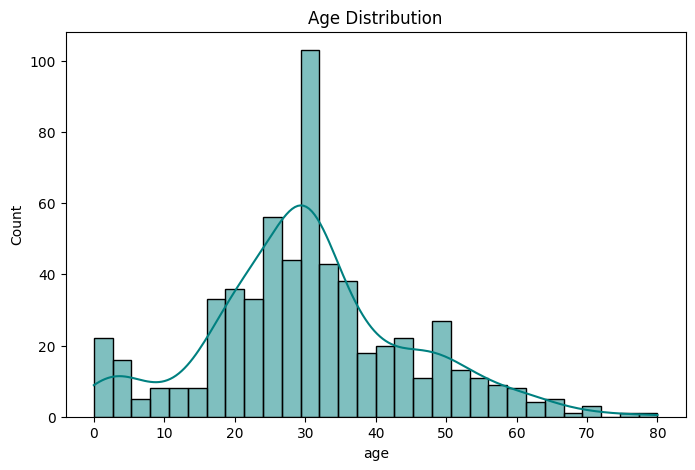

In [10]:
# Plotting the distribution of 'Age'
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution")
plt.show()

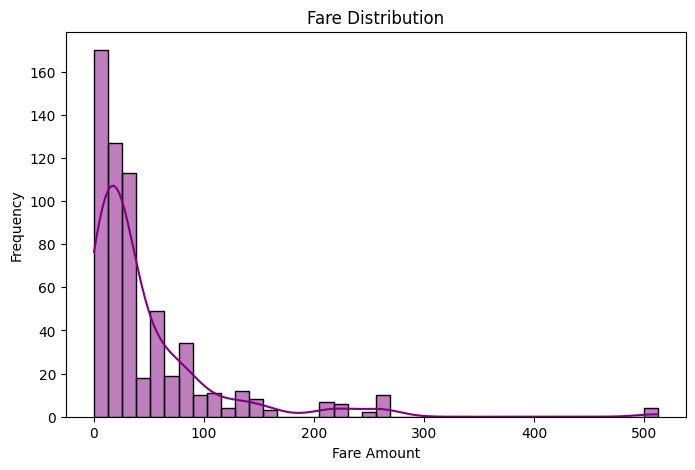

In [11]:
# Plotting the distribution of 'Fare' 
plt.figure(figsize=(8,5))
sns.histplot(df['fare'], bins=40, kde=True, color='purple')
plt.title("Fare Distribution")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

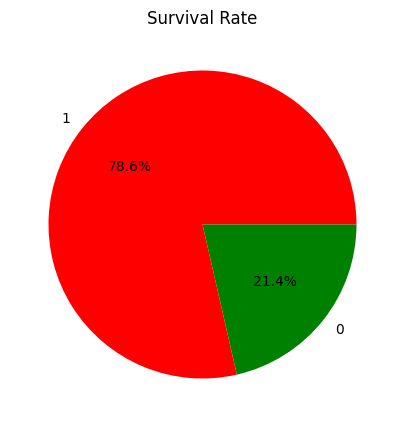

In [12]:
# Plotting the proportion of survivors and non-survivors using a pie chart
plt.figure(figsize=(5,5))
df['survived'].value_counts().plot.pie(autopct='%1.1f%%', colors=["red", "green"])
plt.title("Survival Rate")
plt.ylabel("")  
plt.show()

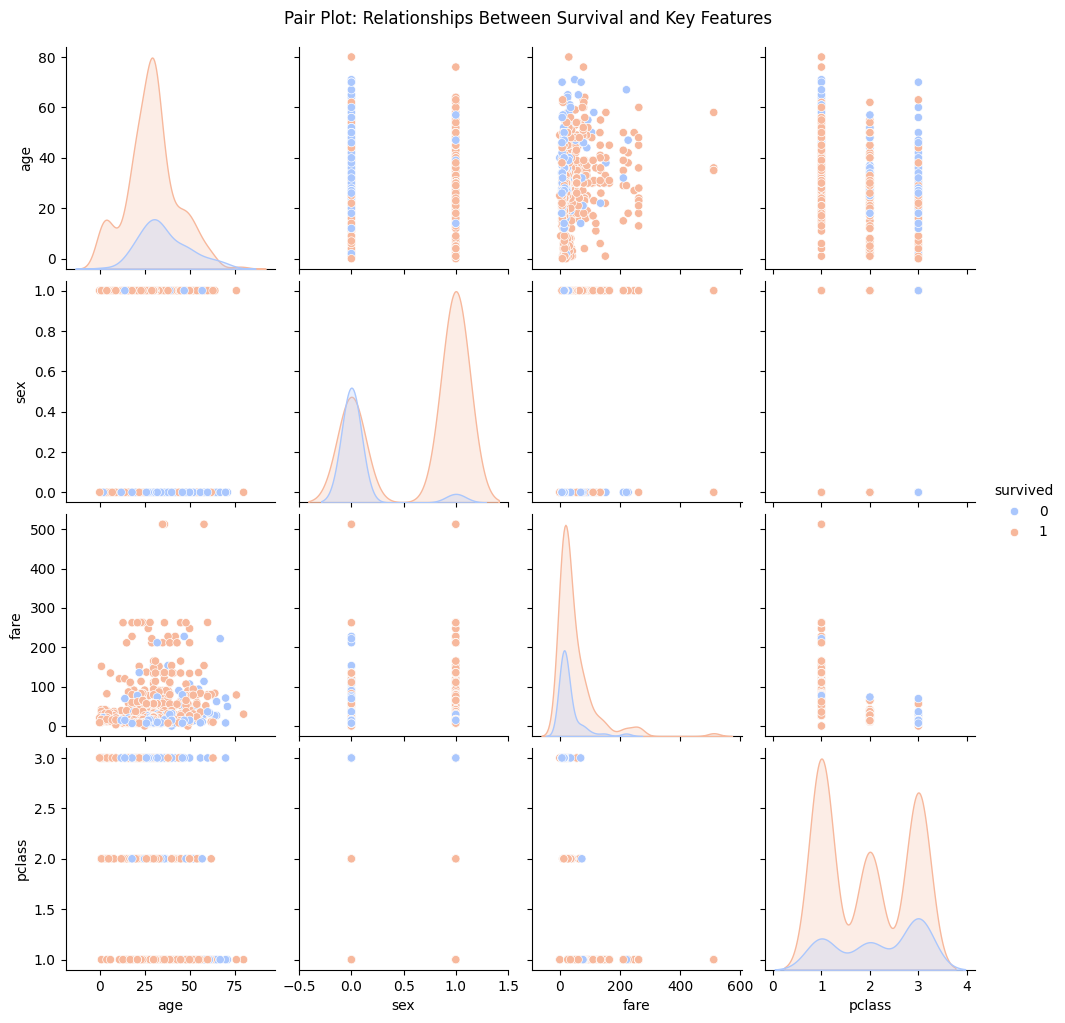

In [20]:
# Pair plot to explore relationships between survival and key features 
sns.pairplot(df, hue='survived', vars=['age', 'sex', 'fare', 'pclass'], palette='coolwarm')

plt.suptitle("Pair Plot: Relationships Between Survival and Key Features", y=1.02)
plt.show()

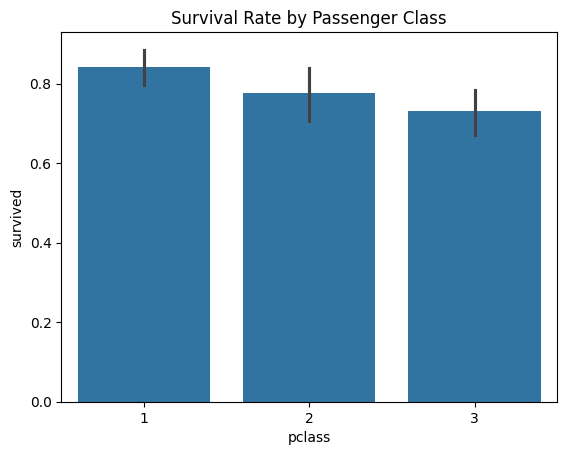

In [15]:
# Plotting survival distribution by passenger class 
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

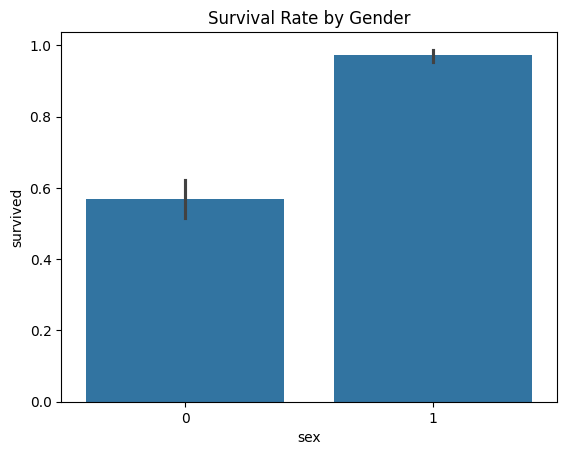

In [16]:
# Plotting survival distribution by sex
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

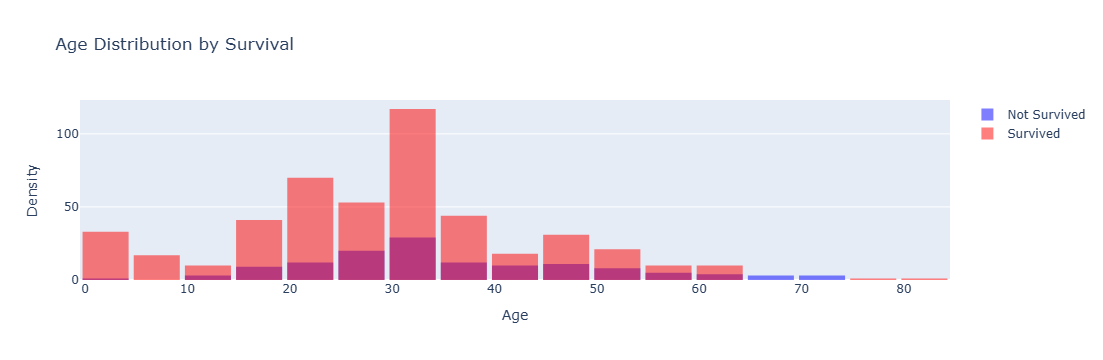

In [20]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add histogram for passengers who did not survive (Blue color for "Not Survived")
fig.add_trace(go.Histogram(
    x=df[df['survived'] == 0]['age'], 
    name='Not Survived', 
    opacity=0.5,
    marker=dict(color='blue')  # Color for Not Survived
))

# Add histogram for passengers who survived (Red color for "Survived")
fig.add_trace(go.Histogram(
    x=df[df['survived'] == 1]['age'], 
    name='Survived', 
    opacity=0.5,
    marker=dict(color='red')  # Color for Survived
))

# Customize layout
fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',  # Overlay the two histograms
    bargap=0.1,  # Set a small gap between bars
)

# Show the plot
fig.show()

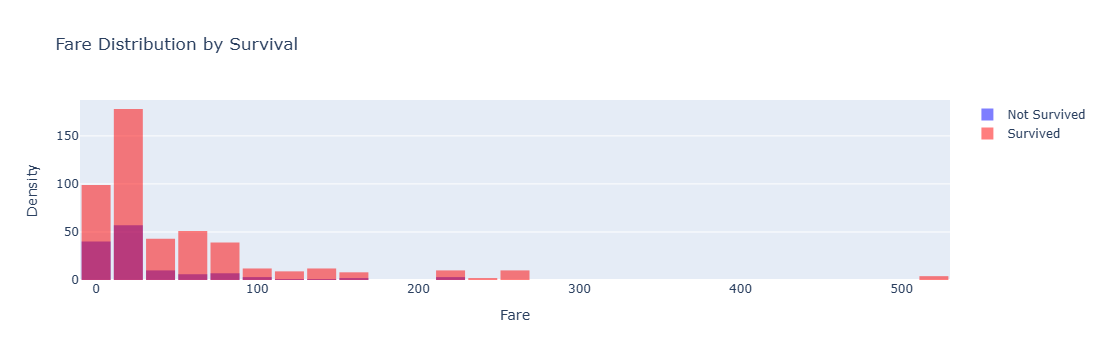

In [22]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add histogram for passengers who did not survive (Blue color for "Not Survived")
fig.add_trace(go.Histogram(
    x=df[df['survived'] == 0]['fare'], 
    name='Not Survived', 
    opacity=0.5,
    marker=dict(color='blue')  # Color for Not Survived
))

# Add histogram for passengers who survived (Red color for "Survived")
fig.add_trace(go.Histogram(
    x=df[df['survived'] == 1]['fare'], 
    name='Survived', 
    opacity=0.5,
    marker=dict(color='red')  # Color for Survived
))

# Customize layout
fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',  # Overlay the two histograms
    bargap=0.1,  # Set a small gap between bars
)

# Show the plot
fig.show()

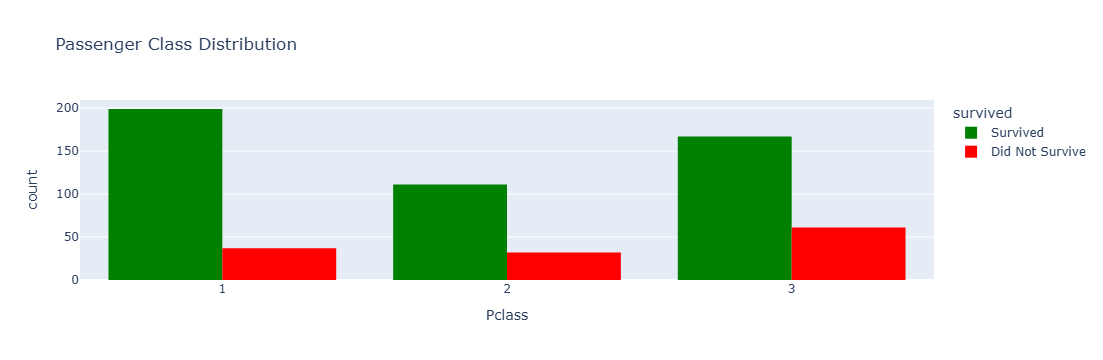

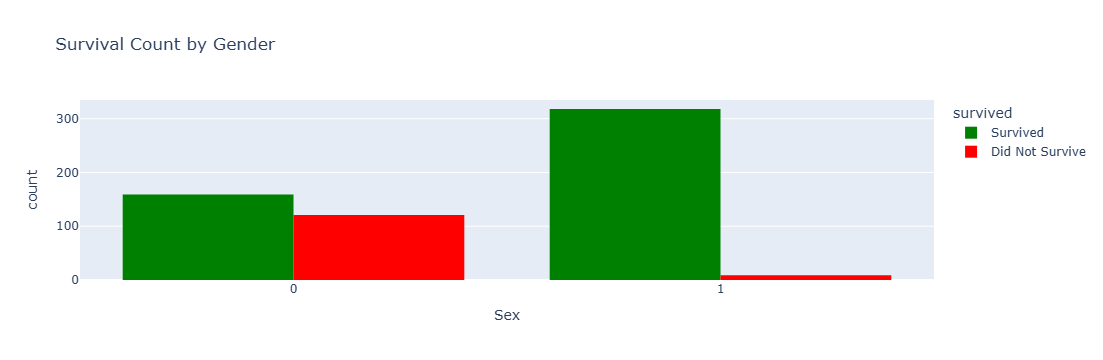

In [23]:
import plotly.express as px  

# Convert 'survived' to categorical for better visualization
df['survived'] = df['survived'].map({0: 'Did Not Survive', 1: 'Survived'})

# Create a grouped bar chart for Pclass
fig1 = px.histogram(df, x="pclass", color="survived", barmode="group",
                    title="Passenger Class Distribution", 
                    labels={"pclass": "Pclass", "count": "Count"}, 
                    color_discrete_map={'Survived': 'green', 'Did Not Survive': 'red'})
fig1.show()

# Create a grouped bar chart for Sex
fig2 = px.histogram(df, x="sex", color="survived", barmode="group",
                    title="Survival Count by Gender", 
                    labels={"sex": "Sex", "count": "Count"}, 
                    color_discrete_map={'Survived': 'green', 'Did Not Survive': 'red'})
fig2.show()

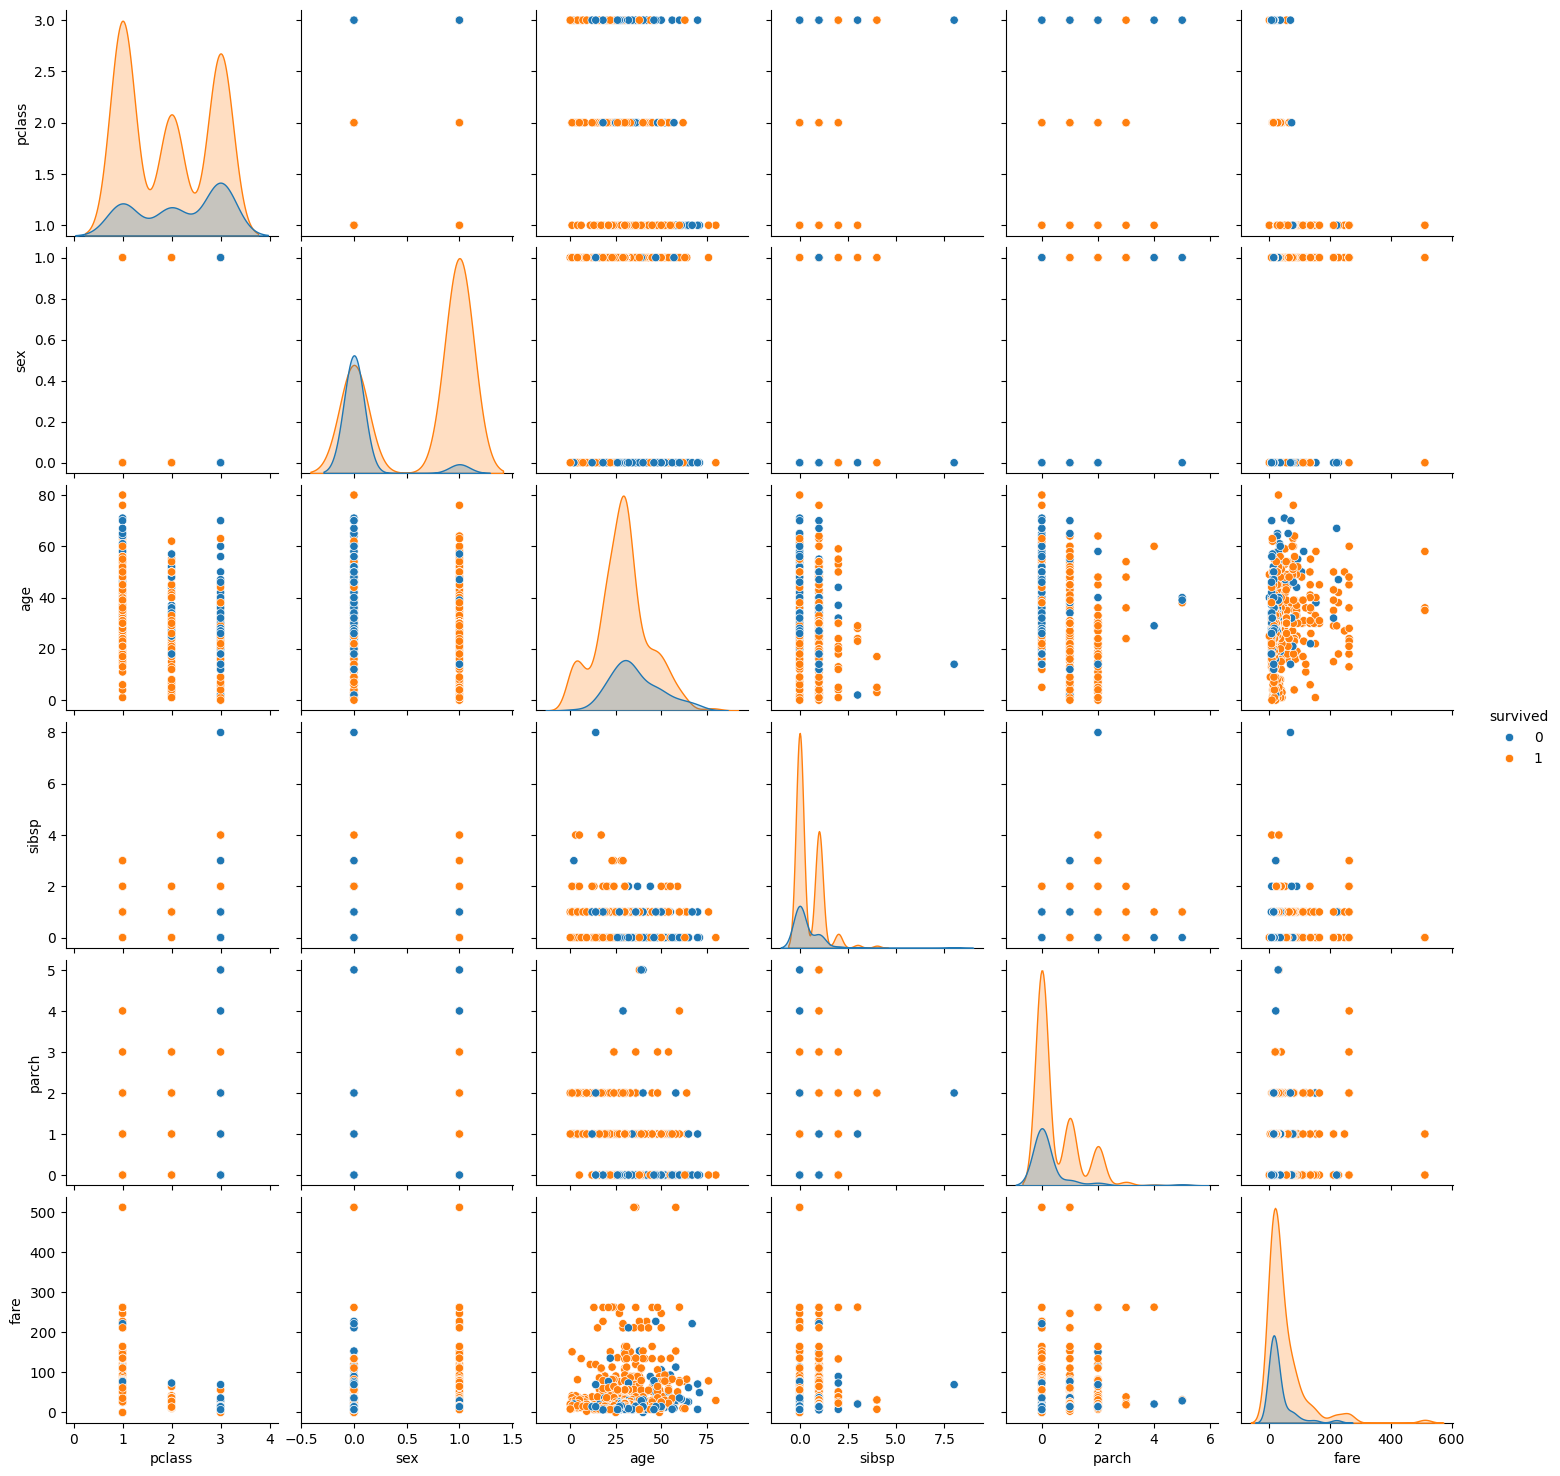

In [34]:
sns.pairplot(df, hue="survived")
plt.show()

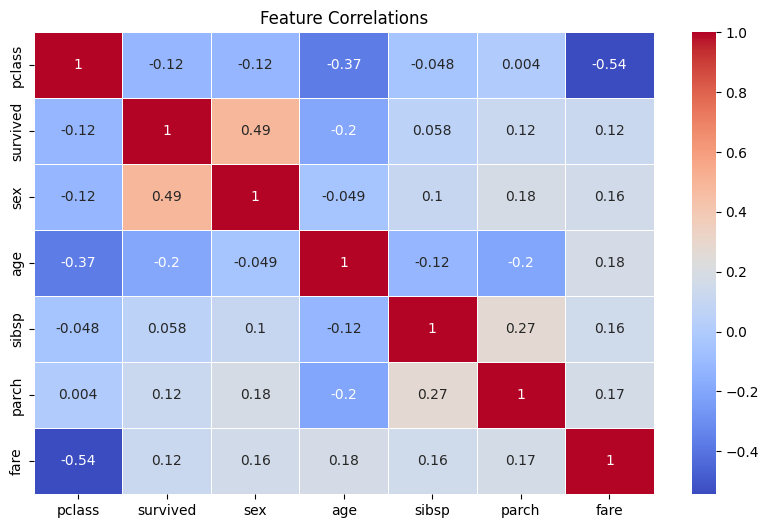

In [36]:
# Generating a correlation matrix for the numerical features
# Filter only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Generate the correlation matrix for the numeric columns
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()